## Import resources

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

## Reading in an image and display the image


In [59]:
# Read in image
image = cv2.imread('BlueBackgroundCarrot.jpeg')

#Print out the type of image data and its dimension 
print('This image is:', type(image), 'with dimension of:',image.shape)

This image is: <class 'numpy.ndarray'> with dimension of: (1100, 733, 3)


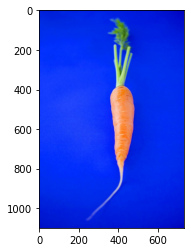

In [60]:
#make a copy of image
image_copy = np.copy(image)
#change color to RGB
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

## Define the color threshold

In [61]:
## Define the color selection boundaries in RGB values
#Play around with the values until you isolate the blue background
lower_blue = np.array([0,0,190])
upper_blue = np.array([250,250,255])

## Creat a mask

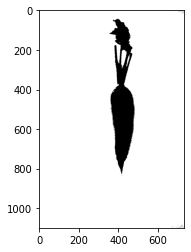

In [62]:
#Define the mask area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask,cmap='gray')

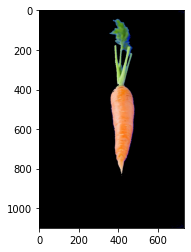

In [63]:
# Mask the image to let the Carrot show through
masked_image = np.copy(image_copy)
masked_image[mask!=0]=[0,0,0]
plt.imshow(masked_image)

## Mask and add a background image

(1920, 1028, 3)


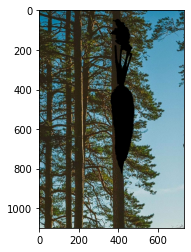

In [71]:
#Load in a bckground image, and convert it to RGB
background_image = cv2.imread('flower.jpeg')
background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)
#cropit to the right size
print(background_image.shape)
croped_background = background_image[0:1100,0:733]
#Mask the cropped background so that the carrot area is blocked
croped_background[mask==0] = [0,0,0]
plt.imshow(croped_background)

## Creat a complete image

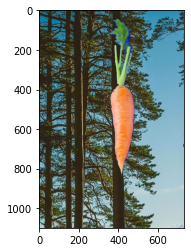

In [73]:
#Add the two images together to create a complete image!
complete_image = masked_image + croped_background
#Display the result
plt.imshow(complete_image)